# Zarr file pre-computed spectrograms

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ooi_2025_summer_school_acoustics as oa
import hvplot.xarray
from dask.distributed import Client

In [4]:
client = Client()
client

<Client: 'tcp://127.0.0.1:45173' processes=8 threads=32, memory=128.00 GiB>

In [2]:
specs = oa.open_lfspectrograms()

In [3]:
specs

<xarray.Dataset> Size: 23GB
Dimensions:    (frequency: 8097, time: 70128)
Coordinates:
  * time       (time) datetime64[ns] 561kB 2015-01-01 ... 2022-12-31T23:00:00
  * frequency  (frequency) float64 65kB 0.0 0.01235 0.0247 ... 99.98 99.99 100.0
Data variables:
    AXEC2      (frequency, time) float64 5GB dask.array<chunksize=(8097, 20), meta=np.ndarray>
    HYSB1      (frequency, time) float64 5GB dask.array<chunksize=(8097, 20), meta=np.ndarray>
    AXCC1      (frequency, time) float64 5GB dask.array<chunksize=(8097, 20), meta=np.ndarray>
    HYS14      (frequency, time) float64 5GB dask.array<chunksize=(8097, 20), meta=np.ndarray>
    AXBA1      (frequency, time) float64 5GB dask.array<chunksize=(8097, 20), meta=np.ndarray>

In [5]:
mean_psd = specs.mean('time')

In [7]:
mean_psd = mean_psd.compute()

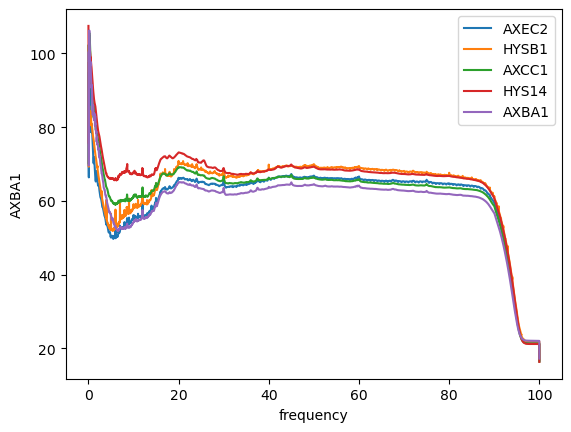

In [8]:
for node in mean_psd:
    mean_psd[node].plot(label=node)
plt.legend()
plt.show()

In [12]:
specs_20hz = specs.sel({'frequency':slice(15,25)}).mean('frequency')

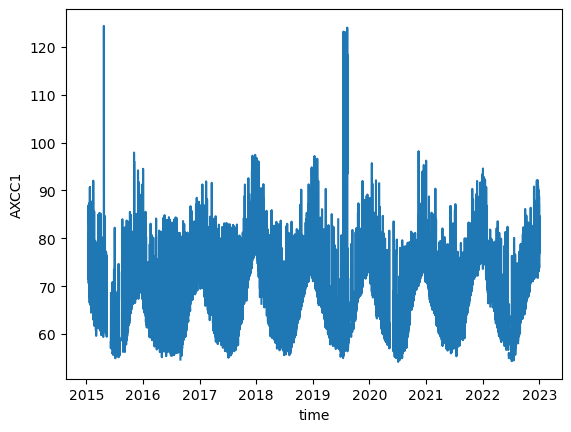

In [13]:
specs_20hz['AXCC1'].plot()
plt.show()

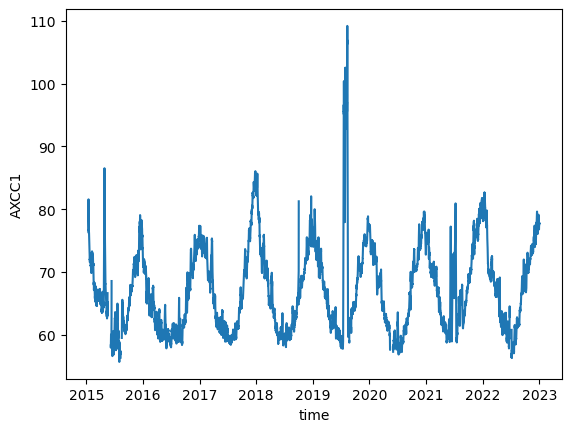

In [16]:
specs_smooth = specs_20hz.rolling(time=100, min_periods=1).mean('time')
specs_smooth['AXCC1'].plot()